In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [2]:
x = np.array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])
y = np.array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

X = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

2022-12-03 14:03:36.490886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [3]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(8),
    # tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [4]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 916ms/step - loss: 12.0425 - mae: 12.0425
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.9975 - mae: 11.9975
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.9525 - mae: 11.9525
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.9074 - mae: 11.9074
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 11.8622 - mae: 11.8622


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [6]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
model.predict([17.])

1/1 [==============================] - 0s 191ms/step


array([[8.081557]], dtype=float32)

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 607ms/step - loss: 17.6836 - mae: 17.6836
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 17.6442 - mae: 17.6442
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 17.6049 - mae: 17.6049
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 17.5656 - mae: 17.5656
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 17.5263 - mae: 17.5263


In [9]:
model.predict([17.])

1/1 [==============================] - 0s 142ms/step


array([[-15.367333]], dtype=float32)

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 570ms/step - loss: 10.2381 - mae: 10.2381
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2060 - mae: 10.2060
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1739 - mae: 10.1739
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1417 - mae: 10.1417
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1094 - mae: 10.1094
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0772 - mae: 10.0772
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 10.0448 - mae: 10.0448
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0125 - mae: 10.0125
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9801 - mae: 9.9801
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9477 - mae: 9.9477
Epoch 11/100
1/1 [==============================] - 0s 10

In [11]:
model.predict([17])

1/1 [==============================] - 0s 122ms/step


array([[30.07448]], dtype=float32)

# Make a bigger dataset

In [15]:
X = np.arange(-100, 100, 4)

In [16]:
y = X + 10

In [17]:
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [18]:
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [46]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [55]:
def vizualize_plot(X_train, y_train, X_test, y_test, predictions=[]):
    plt.figure(figsize=(12,5))
    plt.scatter(X_train, y_train, c='b', label='train data')
    plt.scatter(X_test, y_test, c='g', label='test data')
    if len(predictions) == len(X_test):
        plt.scatter(X_test, predictions, c='k', label='preds')
        
    plt.title("Train Test Datas")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

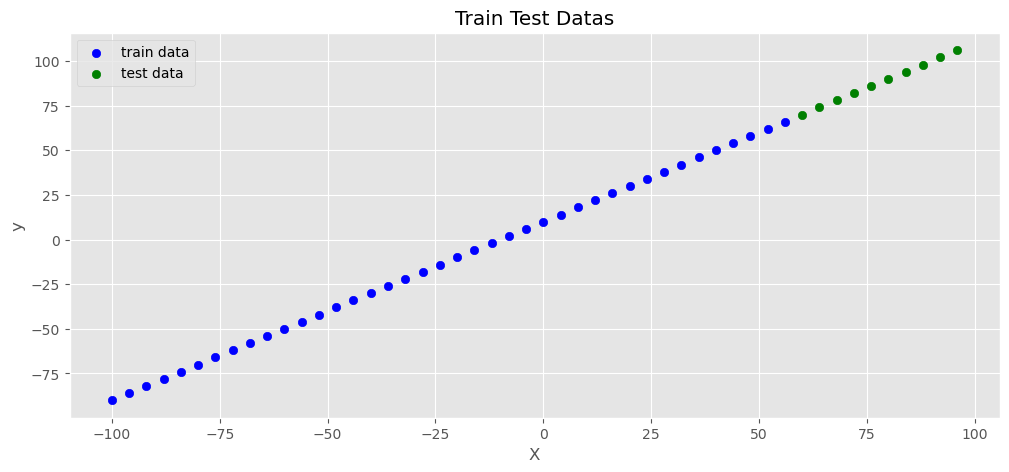

In [56]:
vizualize_plot(X_train, y_train, X_test, y_test)

In [49]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 35ms/step


array([[104.63243],
       [111.56806],
       [118.50369],
       [125.43931],
       [132.37495],
       [139.31056],
       [146.24622],
       [153.18181],
       [160.11745],
       [167.05307]], dtype=float32)

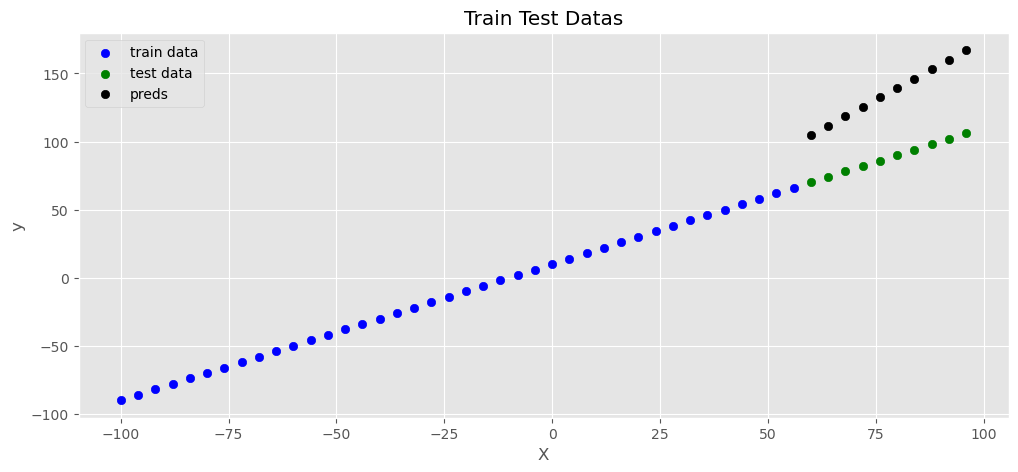

In [57]:
vizualize_plot(X_train, y_train, X_test, y_test, predictions=y_preds)

In [58]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 227ms/step - loss: 47.8428 - mae: 47.8428


[47.84275817871094, 47.84275817871094]

In [66]:
# Calculate the mean absolute error
def mae(y_test=y_test, y_pred=y_preds):
    y_pred = tf.squeeze(y_pred)
    return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred).numpy()

def mse(y_test=y_test, y_pred=y_preds):
    y_pred = tf.squeeze(y_pred)
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred).numpy()

In [67]:
mae()

47.842754

In [68]:
mse()

2360.0269

---

In [70]:
url = ("https://raw.githubusercontent.com/stedy/"
       "Machine-Learning-with-R-datasets/master/insurance.csv")
df = pd.read_csv(url)
df.sample(8)

,age,sex,bmi,children,smoker,region,charges
488,44,female,38.060,0,yes,southeast,48885.13561
376,39,female,24.890,3,yes,northeast,21659.93010
124,47,female,33.915,3,no,northwest,10115.00885
762,33,male,27.100,1,yes,southwest,19040.87600
914,33,male,24.605,2,no,northwest,5257.50795
1105,54,female,31.240,0,no,southeast,10338.93160
1065,42,female,25.300,1,no,southwest,7045.49900
1101,53,male,28.600,3,no,southwest,11253.42100


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
numerical = ['age', 'bmi', 'children', ]
categorical = ['sex', 'smoker', 'region']

data, target = df.drop(columns=['charges']), df.charges

In [75]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data,
    target,
    test_size=.2,
    random_state=11
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

In [76]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

X_train_ohe = encoder.fit_transform(X_train[categorical])
X_test_ohe = encoder.transform(X_test[categorical])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names_out())
X_train_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names_out())

In [78]:
X_train = np.column_stack([X_train[numerical], X_train_ohe])
X_train = pd.DataFrame(X_train, columns=numerical+list(encoder.get_feature_names_out()))

X_test = np.column_stack([X_test[numerical], X_test_ohe])
X_test = pd.DataFrame(X_test, columns=numerical+list(encoder.get_feature_names_out()))

In [79]:
X_train = X_train.drop(columns=['sex_male'])
X_test = X_test.drop(columns=['sex_male'])

In [80]:
X_train.head(3)

,age,bmi,children,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.695652,0.423792,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.130435,0.296985,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.652174,0.354812,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
X_test.head(3)

,age,bmi,children,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.492496,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.347826,0.300289,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.521739,0.449952,0.2,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [100]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
    
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [101]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3096.0537 - mae: 3096.0537


[3096.0537109375, 3096.0537109375]

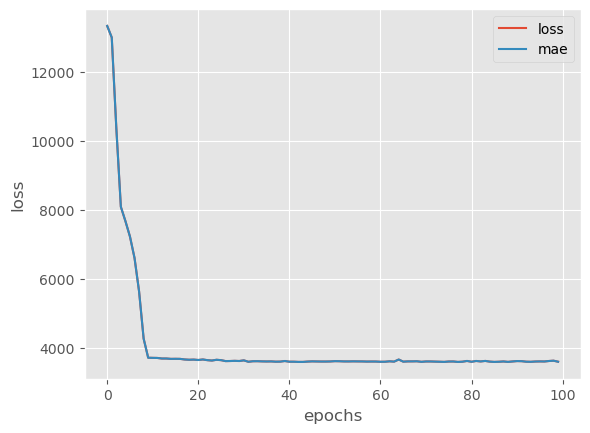

In [91]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");